In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [4]:
df = pd.read_csv('Liver_disease_data.csv')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1700.0,50.394118,17.641915,20.000000,35.000000,51.000000,66.000000,80.000000
Gender,1700.0,0.504118,0.500130,0.000000,0.000000,1.000000,1.000000,1.000000
BMI,1700.0,27.699801,7.210400,15.004710,21.455414,27.925367,33.957668,39.992845
AlcoholConsumption,1700.0,9.832309,5.757472,0.003731,4.841811,9.828195,14.871671,19.952456
Smoking,1700.0,0.291765,0.454708,0.000000,0.000000,0.000000,1.000000,1.000000
GeneticRisk,1700.0,0.521765,0.666262,0.000000,0.000000,0.000000,1.000000,2.000000
PhysicalActivity,1700.0,5.000993,2.847074,0.001852,2.622121,5.022883,7.401642,9.994964
Diabetes,1700.0,0.142353,0.349515,0.000000,0.000000,0.000000,0.000000,1.000000
Hypertension,1700.0,0.154706,0.361730,0.000000,0.000000,0.000000,0.000000,1.000000
LiverFunctionTest,1700.0,59.863867,22.996262,20.019254,40.024216,59.513146,79.428755,99.991413


In [5]:
pd.DataFrame(df.isna().sum()).T

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
X = df.drop(columns='Diagnosis')
y = df['Diagnosis']

# <u>**MACHINE LEARNING - PREDICTION**</u>

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1360, 10), (340, 10), (1360,), (340,))

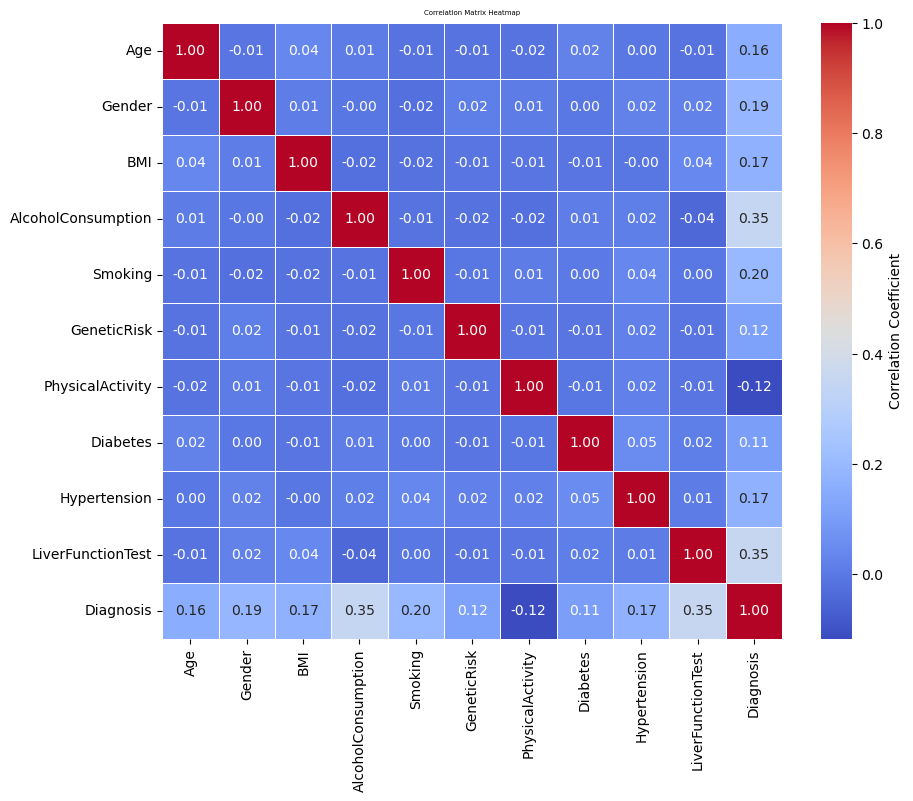

In [19]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix Heatmap', fontsize=5)

plt.show()

In [20]:
df.isna().sum()

Age                   0
Gender                0
BMI                   0
AlcoholConsumption    0
Smoking               0
GeneticRisk           0
PhysicalActivity      0
Diabetes              0
Hypertension          0
LiverFunctionTest     0
Diagnosis             0
dtype: int64

<Axes: xlabel='Diagnosis', ylabel='count'>

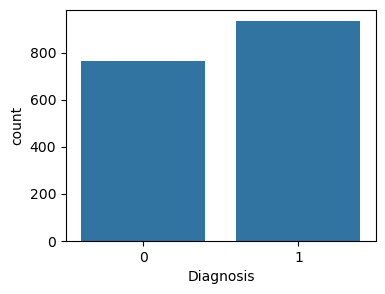

In [21]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.countplot(x = 'Diagnosis', data = df)

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

In [28]:
randomforest = RandomForestClassifier(n_estimators=30)

In [29]:
randomforest.fit(x_train,y_train)

RandomForestClassifier(n_estimators=30)

In [30]:
randomforest.score(x_test,y_test)

0.8823529411764706

In [40]:
import pickle
pickle.dump(randomforest , open('liver_disease.pkl' , 'wb'))

In [41]:
import pickle
filename = 'liverdisease.sav'
pickle.dump(randomforest,open(filename, 'wb'))

In [42]:
from tensorflow.keras.models import load_model
model.save('model_save/liverdisease_r.h5')

In [31]:
y_pred1 = randomforest.predict(x_test)
y_pred1

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,

In [32]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       153
           1       0.94      0.84      0.89       187

    accuracy                           0.88       340
   macro avg       0.88      0.89      0.88       340
weighted avg       0.89      0.88      0.88       340



In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

#from imblearn.over_sampling import RandomOverSampler

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, callbacks
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [34]:
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001, # (0.001)minimium amount of change to count as an improvement
    patience = 10,     #(20) how many epochs to wait before stopping
    restore_best_weights = True,
)

model = keras.Sequential([
    layers.Dense(512, activation = 'relu', input_shape = [x_train.shape[1]]),
    layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    optimizer = RMSprop(learning_rate = 0.001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [35]:
history = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    batch_size = 20,
    epochs = 500,
    callbacks = [early_stopping]
)

Epoch 1/500
68/68 [==============================] - 1s 8ms/step - loss: 0.8851 - accuracy: 0.6051 - val_loss: 0.7705 - val_accuracy: 0.5765
Epoch 2/500
68/68 [==============================] - 0s 3ms/step - loss: 0.7456 - accuracy: 0.6434 - val_loss: 0.4873 - val_accuracy: 0.7824
Epoch 3/500
68/68 [==============================] - 0s 3ms/step - loss: 0.7246 - accuracy: 0.6640 - val_loss: 0.4851 - val_accuracy: 0.7676
Epoch 4/500
68/68 [==============================] - 0s 4ms/step - loss: 0.7112 - accuracy: 0.6743 - val_loss: 0.5431 - val_accuracy: 0.7265
Epoch 5/500
68/68 [==============================] - 0s 3ms/step - loss: 0.6663 - accuracy: 0.6765 - val_loss: 0.5271 - val_accuracy: 0.7265
Epoch 6/500
68/68 [==============================] - 0s 3ms/step - loss: 0.6693 - accuracy: 0.6743 - val_loss: 0.5580 - val_accuracy: 0.7059
Epoch 7/500
68/68 [==============================] - 0s 4ms/step - loss: 0.6475 - accuracy: 0.7015 - val_loss: 0.4742 - val_accuracy: 0.7588
Epoch 8/500
6

In [36]:
# Getting the accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

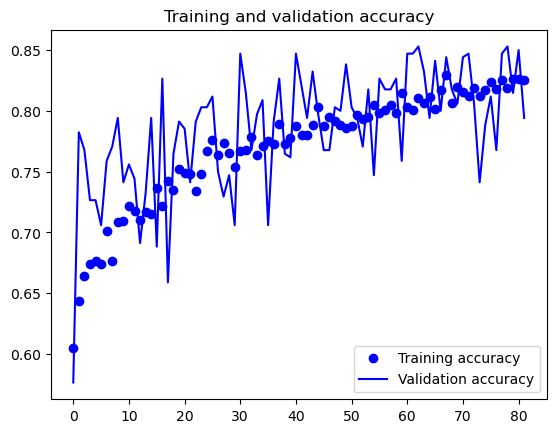

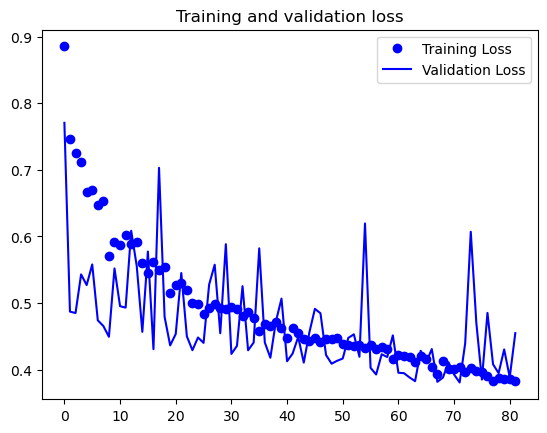

In [37]:
# Plotting the accuracy
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

# Plotting the loss
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [38]:
y_pred = np.where(model.predict(x_test) >= 0.5, 1, 0)

11/11 [==============================] - 0s 1ms/step


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       153
           1       0.88      0.84      0.86       187

    accuracy                           0.85       340
   macro avg       0.85      0.85      0.85       340
weighted avg       0.85      0.85      0.85       340

